# Problem Statement:
    
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.preprocessing import OrdinalEncoder,power_transform,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from lightgbm import LGBMRegressor
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
import pingouin as pg
import plotly.express as px

import pickle
import joblib


# Loading the Training Dataset

In [2]:
train=pd.read_csv("bigdatamart_Train.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Remarks: In the above cell,we can see the first five and last five rows of the training dataset which includes the target label "Item_Outlet_Sales" column and the remaining feature columns that determine or help in predicting the sales. Since sales is a continuous value, this makes it a Regression problem.

# Loading the Testing Dataset

In [3]:
test=pd.read_csv("bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Remarks: In the above cell. we can see the first five and last five rows of data present in the testing dataset. Unlike the training dataset, we do not have the target label present here and therefore consists only of the feature columns where the target label which is "Item_Outlet_Sales" to be predicted.

# Data Exploration/Analysis

In [4]:
#Printing first 5 rows of training dataset

train.head().style.background_gradient(cmap='plasma')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,nan,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200


In [5]:
#Printing last 5 rows of training dataset

train.tail().style.background_gradient(cmap='plasma')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521800,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383400
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.157000,OUT045,2002,nan,Tier 2,Supermarket Type1,549.285000
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122400,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113600
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133200,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597600
8522,DRG01,14.800000,Low Fat,0.044878,Soft Drinks,75.467000,OUT046,1997,Small,Tier 1,Supermarket Type1,765.670000


From the tables above, we note that some features contains missing values (NaN = not a number), that we have to deal with.

In [6]:
#checking the train dataset dimension
train.shape

(8523, 12)

In [7]:
# checking the column names of train dataset

train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
#Checking datatype information of train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Remarks: The training-set has 8523 Columns and 11 features + the target label (Item_Outlet_Sales). 4 of the features are floats, 1 is integer and 7 are objects. Below We have listed the features with a short description:

Item_Identifier: Unique Product ID

Item_Weight: Weight of product in grams

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The percentage of total display area of all products in a store allocated to that particular product

Item_Type: The category in which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique Store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area coverage

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the Outcome/Target data to be predicted.

In [9]:
#checking train dataset for null values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Remarks: We cannot leave the cells "Item_Weight" and "Outlet_Size" empty, thus have to fill the tables with the most suitable values.

# Statistical Analysis of the training dataset

In [10]:
train.describe().T.style.background_gradient(cmap='flag')

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


Remarks:

count for all the columns are different, so, data is missing.

A difference between 75th percentile and max is present in Item_MRP . There might be some outliers.

In [11]:
#Checking for unique values

train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Remarks: This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that is catching attention is that Item_Type has 16 unique values.

In [12]:
#Printing first 5 rows of testing dataset

test.head().style.background_gradient(cmap='plasma')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.862200,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.319800,OUT017,2007,nan,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.753800,OUT010,1998,nan,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.034000,OUT017,2007,nan,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.118599,Dairy,234.230000,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
#Printing last 5 rows of testing dataset

test.tail().style.background_gradient(cmap='plasma')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.315400,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.144800,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.744000,OUT045,2002,nan,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.621800,OUT017,2007,nan,Tier 2,Supermarket Type1
5680,FDU37,9.500000,Regular,0.104720,Canned,79.796000,OUT045,2002,nan,Tier 2,Supermarket Type1


In [14]:
#checking the train dataset dimension
test.shape

(5681, 11)

In [15]:
# checking the column names of test dataset

test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [16]:
#Checking datatype information of test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [17]:
#checking train dataset for null values

test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
#splitting the train data into groups

train.groupby('Item_Type')['Item_MRP'].agg(['count'])

,count
Item_Type,
Baking Goods,648
Breads,251
Breakfast,110
Canned,649
Dairy,682
Frozen Foods,856
Fruits and Vegetables,1232
Hard Drinks,214
Health and Hygiene,520


In [19]:
# checking counts of unique values
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
#checking unique values in Item_Type
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [21]:
#listing down all the columns in train dataset that have object data type 
obj_columns = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'object':
        obj_columns.append(x)
        
obj_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [22]:
for col in obj_columns:
    print(col)
    print(train[col].value_counts())
    print("="*40)

Item_Identifier
FDG33    10
FDW13    10
FDX31     9
NCB18     9
NCJ30     9
         ..
FDO33     1
FDE52     1
FDK57     1
FDY43     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT0

Remarks:We have chosen to display all the categorical columns and the values that are present in them as a collective value and the number of rows that are covered by them.

In the column "Item_Fat_Content" we can club the types Low fat, LF, low fat into one single entity as they all represent the low fat information in the products. Similarly Regular and reg can be clubbed into one single entity that would display regular/fat details.

The "Outlet_Size" has 3 categories medium size area, small size area and high/large size area. While the "Outlet_Location_Type" also has 3 categories tier 3, tier 2 and tier 1 showcasing whether it is built in a pricey location or not. Finally the "Outlet_Type" shows 4 categories namely Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store.

In [23]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [24]:
train['Year_Old']=2013-train['Outlet_Establishment_Year']
test['Year_Old']=2013-test['Outlet_Establishment_Year']

In [25]:
train['Item_Identifier']=train['Item_Identifier'].str[:2]
test['Item_Identifier']=test['Item_Identifier'].str[:2]

In [26]:
#checking unique values in Outlet_Establishment_Year

train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [27]:
train['Item_Weight']=train['Item_Weight'].astype(float)
test['Item_Weight']=test['Item_Weight'].astype(float)

In [28]:
#filling the nan values with mean
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('mean'))
test['Item_Weight']=test['Item_Weight'].fillna(test.groupby('Item_Type')['Item_Weight'].transform('mean'))

# Exploratory Data Analysis (EDA):

# Univariate Analysis

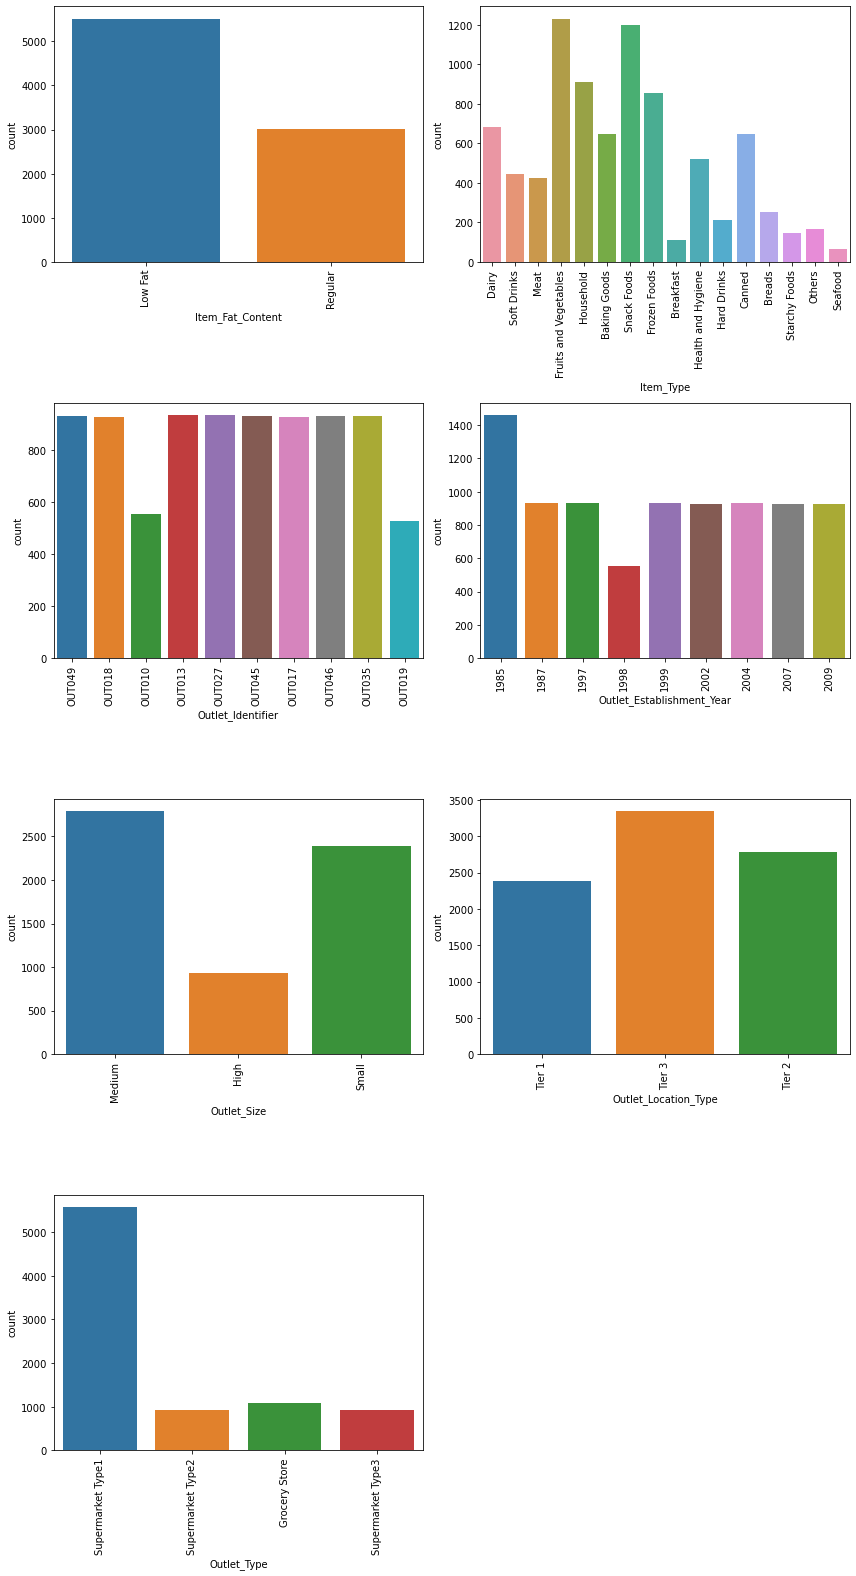

In [29]:
#Countplots

count_col=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
plt.figure(figsize=(12,22))
for i in range(len(count_col)):
  plt.subplot(4,2,i+1)
  sns.countplot(train[count_col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

Observation

1-From Item_Fat_Content, we can say low fat item quantity is high as people wants to buy it for good health

2-From Item_Type, we can say vegetables and snack foods quantity is high because most of the peoples wants to buy it, and seafood and other quantity is less.

3-From Outlet_Establishment we can say more number of marts Established in 1985 and less in 1998

4-There are more marts that have medium outlet_size and less marts of high size.

5-More mart are in tier 3 locations,and less marts in tier 1.

6-From Outlet_Type, we can say supermarket type 1 marts are more as compared to others.

In [30]:
#Distribution plot

In [31]:
dist_col=['Item_Weight','Item_Visibility','Item_MRP']

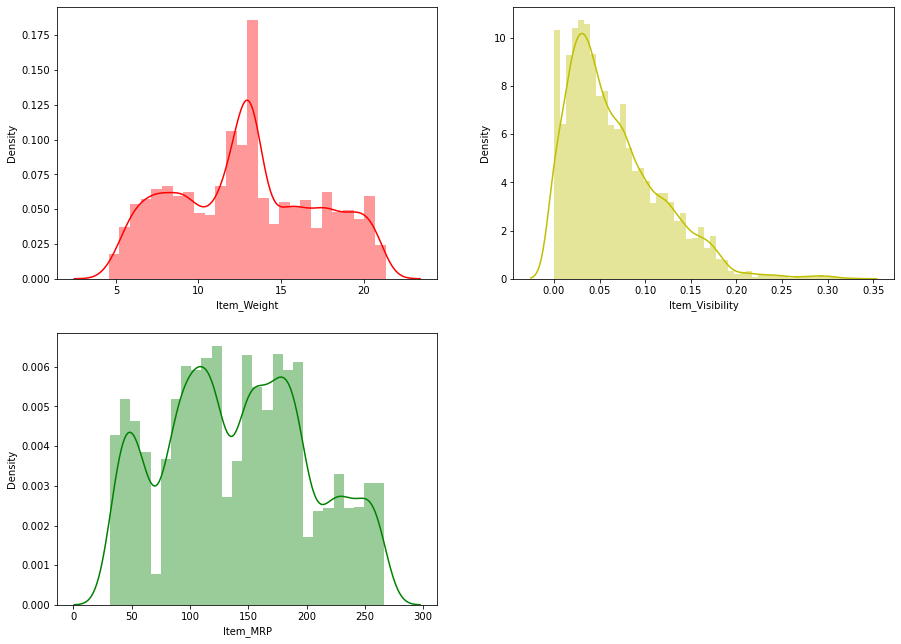

In [32]:
plt.figure(figsize=(15,11))
plt.subplot(2,2,1)
sns.distplot(train['Item_Weight'],color='red')
plt.subplot(2,2,2)
sns.distplot(train['Item_Visibility'],color='y')
plt.subplot(2,2,3)
sns.distplot(train['Item_MRP'],color='g')
plt.show()

Observation:
we only have three columns that have numerical values, others are categorical so from these we can say Item_visibility is right skewed and other columns are also skewed.

# Bivariate Analysis

In [33]:
train_col=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Year_Old']

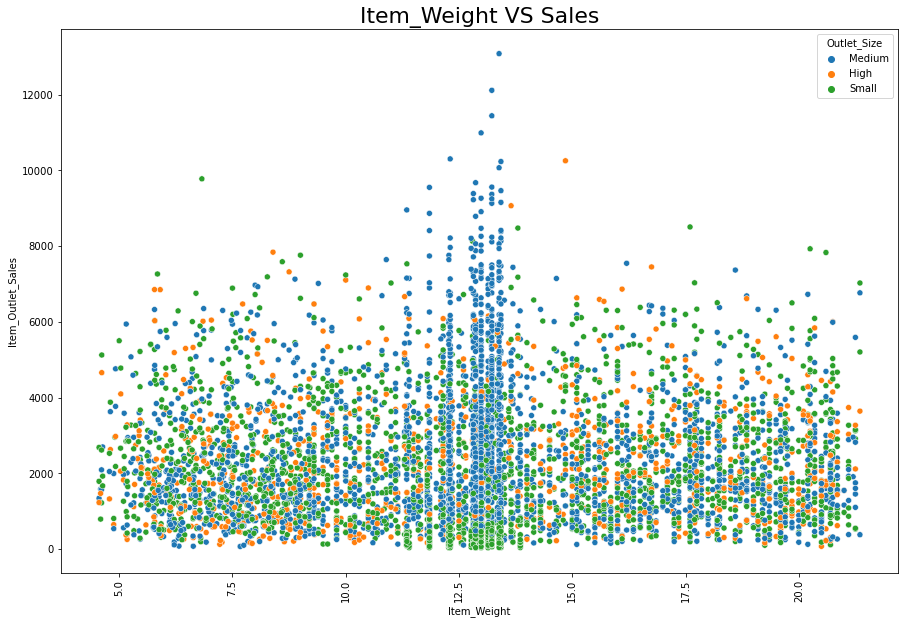

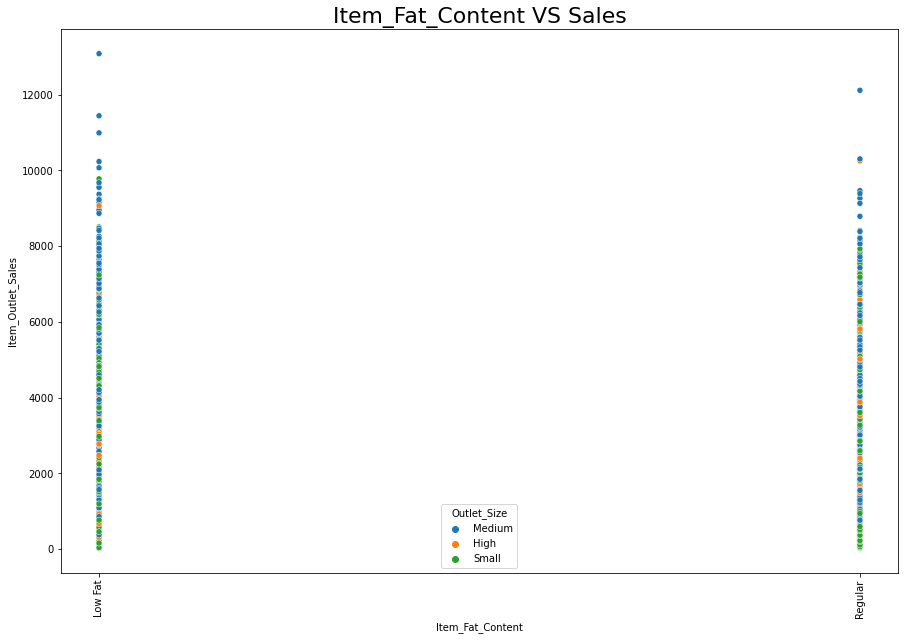

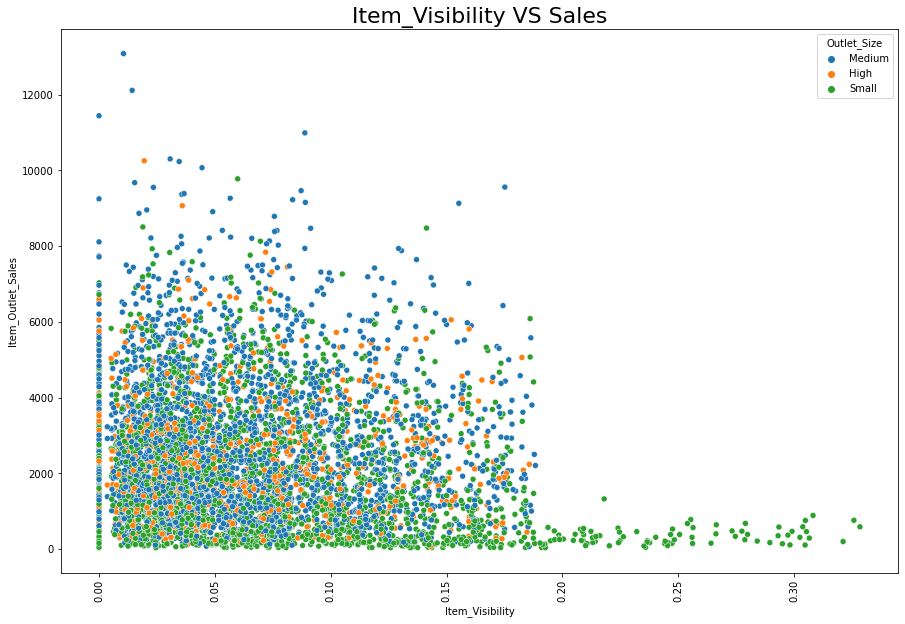

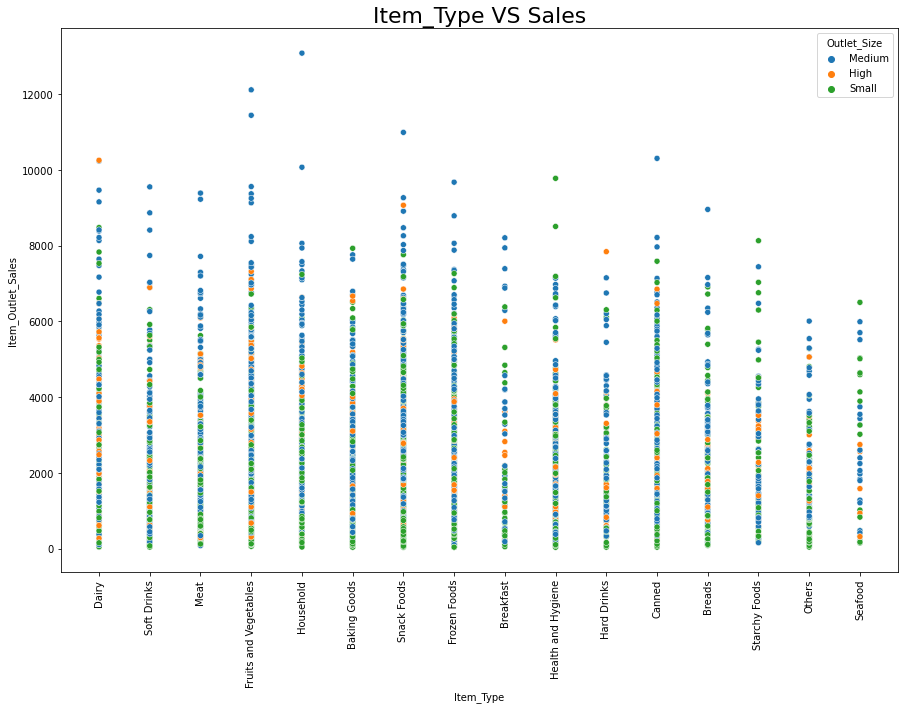

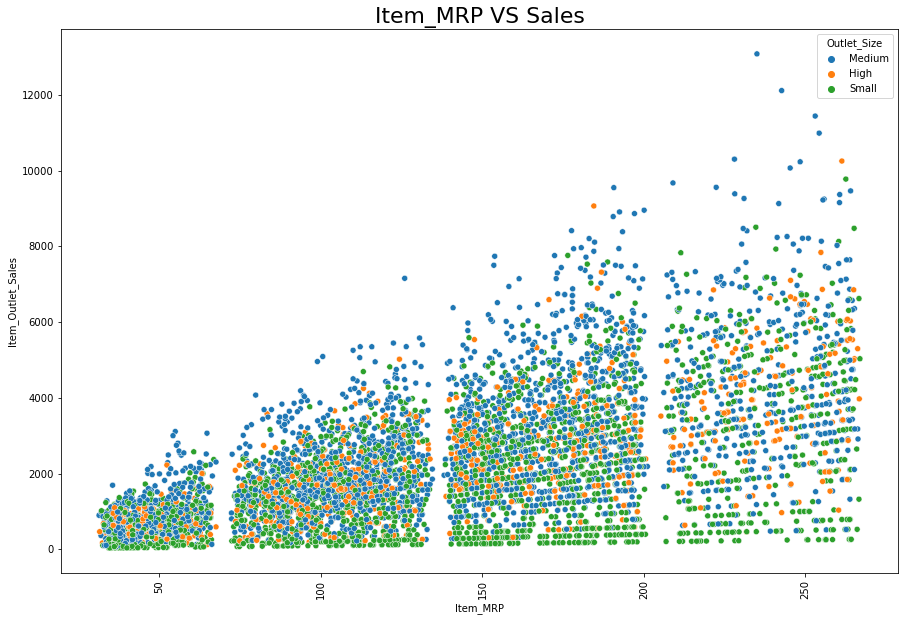

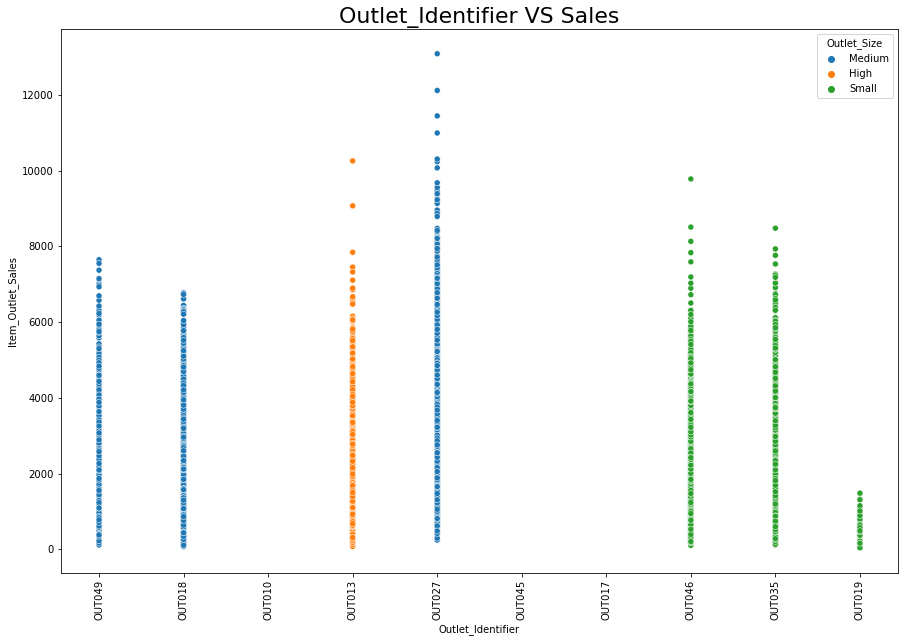

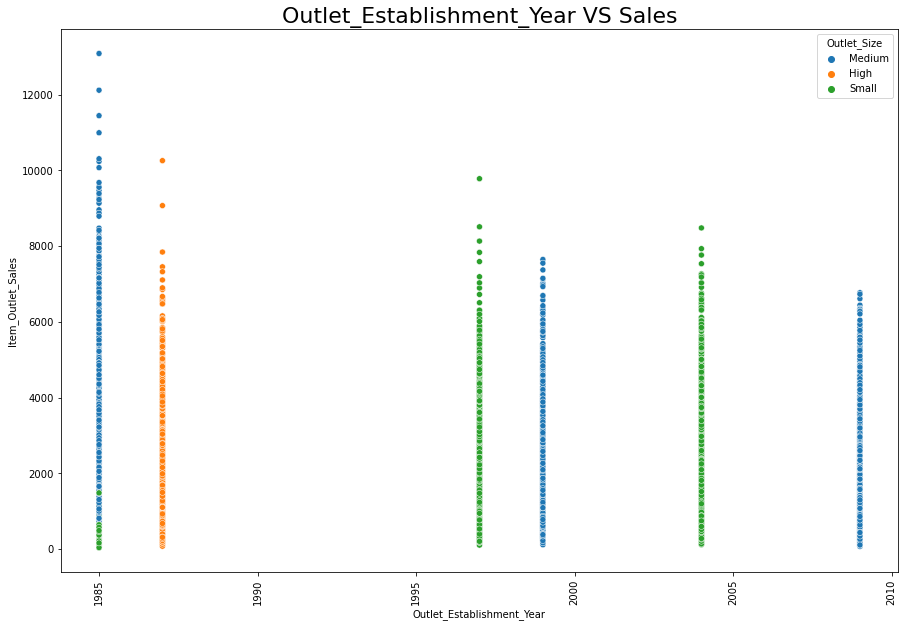

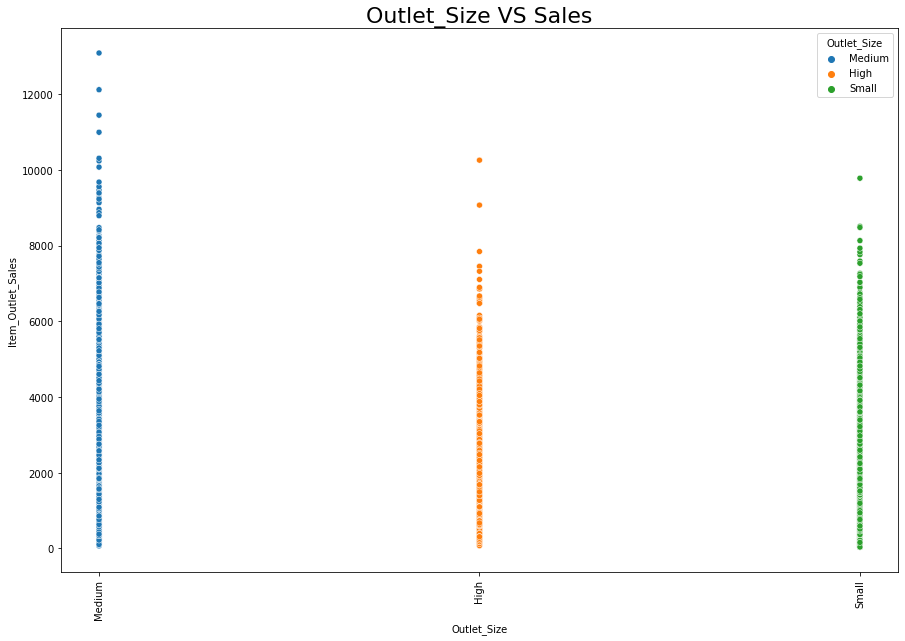

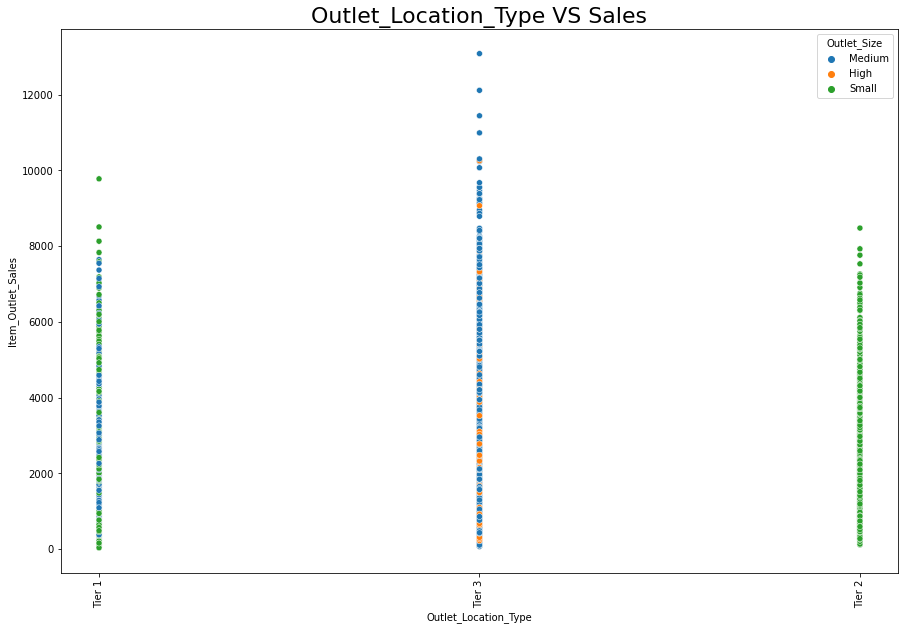

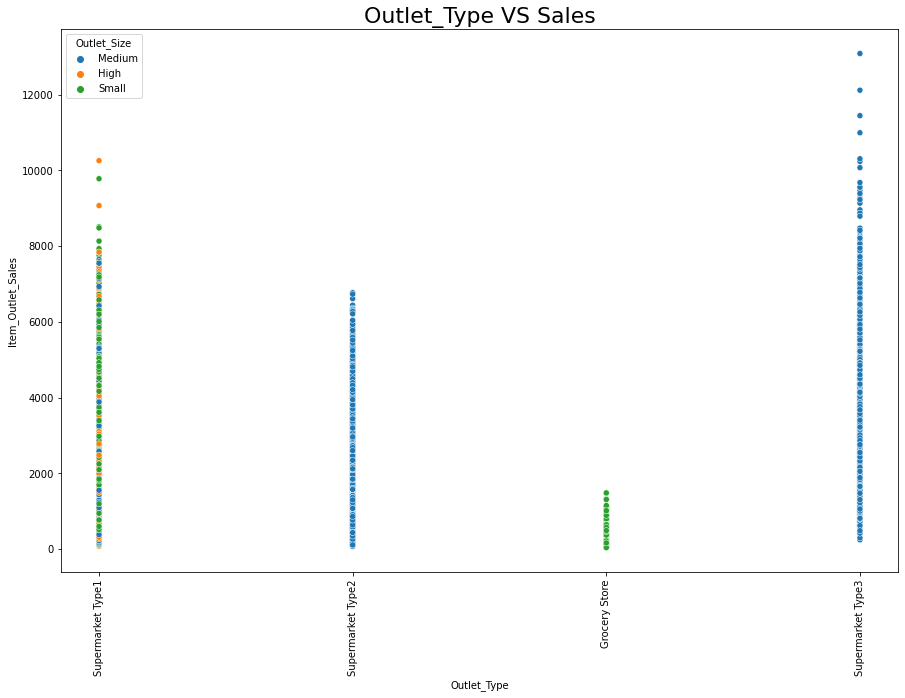

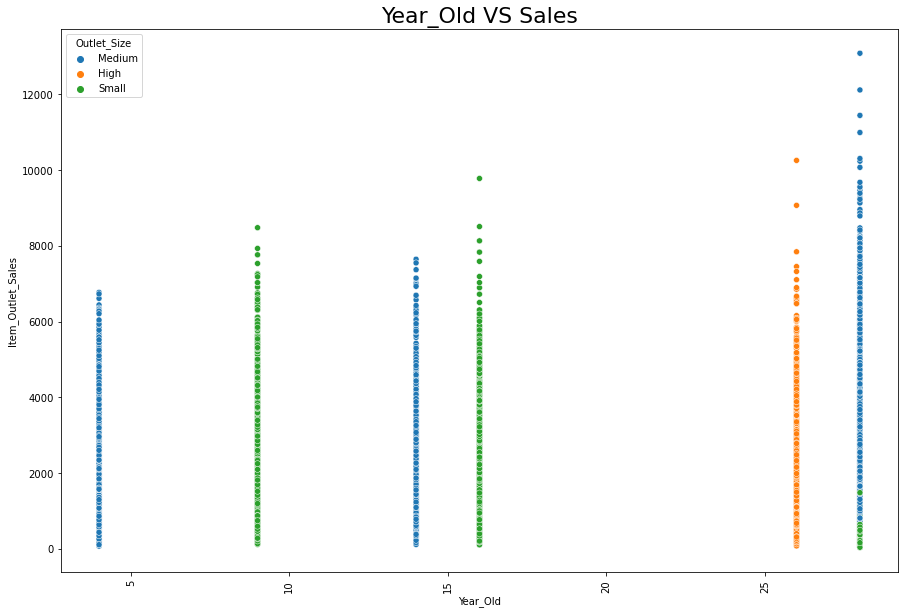

In [34]:
for i in train_col:
  plt.figure(figsize=(15,10))
  sns.scatterplot(x=i,y='Item_Outlet_Sales',data=train,hue='Outlet_Size')
  plt.title(f'{i} VS Sales',fontsize=22)
  plt.xticks(rotation=90)
  plt.show()

Observation:
    
1-From Item_Weight, we can say those item who have an average weight have high sales

2-from Item_Fat_Content, we can say low-fat items have high sales

3-from Item_Visibility, we can say those item who have a value range between 0.00 to 0.05 have high sale and as the value goes toward 0.30 sales reduce.

4-from Item_Type, we can say Fruit and Vegetables,Household,Snack food have high sales and, seafood and others have less sales

5-from Item_MRP, we can that if price is less, more people buys that item but sale is less, and as the price increases, less people buys it but sales increases.

6-from Outlet_Identifier, we can say the item with code OUT027 have the highest sale and code OUT010 have less sales

7-from Outlet_Establishment_Year, we can that older marts are more popular and have high sales

8-from Outlet_Size, we can say the medium size mart have more sales and small size mart have less sales because of less space may be.

9-from Outlet_Location_Type, we can say that tier 3 have the highest sales

10-from Outlet_Type, we can say the supermarket 3 have the highest sales and grocery store has less sales

11-from Year_Old, we can say older the mart, higher is the sales.

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year_Old
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [36]:
#filling the missing values with mode

train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [37]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Year_Old'],
      dtype='object')

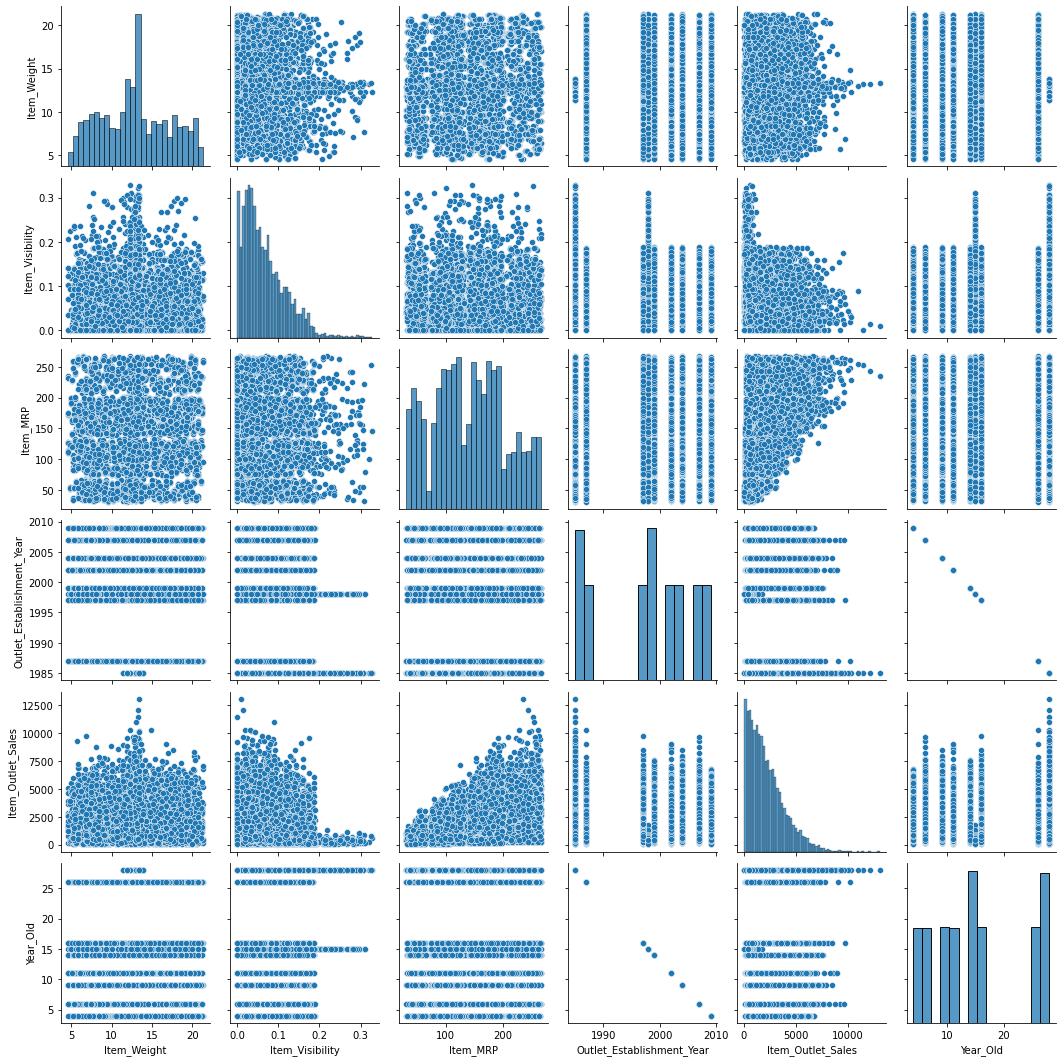

In [38]:
#Pairplot

sns.pairplot(train)

# Encoding

In [39]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [40]:
def one_hot(df,column):
  df=df.copy()
  dummies=pd.get_dummies(df[column],prefix=column)
  df=pd.concat([df,dummies],axis=1)
  df=df.drop(column,axis=1)
  return df

In [41]:
def preprocess(df):
  df=df.copy()
  X=df.drop('Item_Outlet_Sales',axis=1)
  y=df['Item_Outlet_Sales']
  return X,y

In [42]:
X,y=preprocess(train)

# Now We will do Hypothesis Testing to see if categorical columns are statistically significant

In [43]:
expected,observed,stats=pg.chi2_independence(train,x='Item_Fat_Content',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3792.395189,3492.0,2.289462e-04,0.667053,1.0
1,cressie-read,0.666667,3911.630871,3492.0,6.456926e-07,0.677458,1.0
2,log-likelihood,0.000000,4837.793379,3492.0,2.202672e-47,0.753403,1.0
3,freeman-tukey,-0.500000,NaN,3492.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,3492.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,3492.0,NaN,NaN,NaN


Remarks: The p value for fat_content is less then 0.05 that means it is statistically significant

In [44]:
expected,observed,stats=pg.chi2_independence(train,x='Outlet_Type',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.423318e+04,10476.0,3.437197e-121,0.746095,1.0
1,cressie-read,0.666667,1.199731e+04,10476.0,4.831002e-24,0.684991,1.0
2,log-likelihood,0.000000,1.115529e+04,10476.0,2.114855e-06,0.660516,1.0
3,freeman-tukey,-0.500000,NaN,10476.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,10476.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,10476.0,NaN,NaN,NaN


Remarks: The p value for outlet_type is less then 0.05(according to cressie-read and log-likelihood) that means it is statistically significant

In [45]:
expected,observed,stats=pg.chi2_independence(train,x='Item_Identifier',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,7390.726997,6984.0,0.000359,0.658464,1.0
1,cressie-read,0.666667,6574.755135,6984.0,0.999790,0.621053,1.0
2,log-likelihood,0.000000,6662.734293,6984.0,0.997070,0.625194,1.0
3,freeman-tukey,-0.500000,NaN,6984.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,6984.0,0.000000,inf,1.0
5,neyman,-2.000000,NaN,6984.0,NaN,NaN,NaN


Remarks: The p value for item_identifier is less then 0.05 that means it is statistically significant

In [46]:
expected,observed,stats=pg.chi2_independence(train,x='Item_Fat_Content',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3792.395189,3492.0,2.289462e-04,0.667053,1.0
1,cressie-read,0.666667,3911.630871,3492.0,6.456926e-07,0.677458,1.0
2,log-likelihood,0.000000,4837.793379,3492.0,2.202672e-47,0.753403,1.0
3,freeman-tukey,-0.500000,NaN,3492.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,3492.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,3492.0,NaN,NaN,NaN


Remarks: The p value for fat_content is less then 0.05 that means it is statistically significant

In [47]:
expected,observed,stats=pg.chi2_independence(train,x='Outlet_Location_Type',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,7198.756727,6984.0,3.558181e-02,0.649857,1.0
1,cressie-read,0.666667,7192.580329,6984.0,3.978374e-02,0.649578,1.0
2,log-likelihood,0.000000,8509.205957,6984.0,7.133228e-34,0.706534,1.0
3,freeman-tukey,-0.500000,NaN,6984.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,6984.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,6984.0,NaN,NaN,NaN


Remarks: The p value for location_type is less then 0.05 that means it is statistically significant

In [48]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Year_Old'],
      dtype='object')

In [49]:
train['Year_Old'].unique()

array([14,  4, 15, 26, 28, 11,  6, 16,  9], dtype=int64)

In [50]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,4
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,15
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,26
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,11
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,9
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,4


In [51]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Year_Old                     0
dtype: int64

In [52]:
cols=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier']
X=ordinal_transform(X,cols)
test=ordinal_transform(test,cols)

In [53]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old
0,1.0,20.75000,0.0,0.007565,Snack Foods,107.8622,OUT049,1999,1.0,0.0,1.0,14
1,1.0,8.30000,1.0,0.038428,Dairy,87.3198,OUT017,2007,1.0,1.0,1.0,6
2,2.0,14.60000,0.0,0.099575,Others,241.7538,OUT010,1998,1.0,2.0,0.0,15
3,1.0,7.31500,0.0,0.015388,Snack Foods,155.0340,OUT017,2007,1.0,1.0,1.0,6
4,1.0,12.95504,1.0,0.118599,Dairy,234.2300,OUT027,1985,1.0,2.0,3.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1.0,10.50000,1.0,0.013496,Snack Foods,141.3154,OUT046,1997,2.0,0.0,1.0,16
5677,1.0,7.60000,1.0,0.142991,Starchy Foods,169.1448,OUT018,2009,1.0,2.0,2.0,4
5678,2.0,10.00000,0.0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1.0,1.0,1.0,11
5679,1.0,15.30000,1.0,0.000000,Canned,214.6218,OUT017,2007,1.0,1.0,1.0,6


In [54]:
colum=['Item_Type','Outlet_Identifier']
X=one_hot(X,colum)
test=one_hot(test,colum)
Test=test

# We used ordinal-encode where we were having features that have order and  for features having more labels, we used one-hot encoding.

In [55]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,1.0,9.300,0.0,0.016047,249.8092,1999,1.0,0.0,1.0,14,...,0,0,0,0,0,0,0,0,0,1
1,0.0,5.920,1.0,0.019278,48.2692,2009,1.0,2.0,2.0,4,...,0,0,0,1,0,0,0,0,0,0
2,1.0,17.500,0.0,0.016760,141.6180,1999,1.0,0.0,1.0,14,...,0,0,0,0,0,0,0,0,0,1
3,1.0,19.200,1.0,0.000000,182.0950,1998,1.0,2.0,0.0,15,...,1,0,0,0,0,0,0,0,0,0
4,2.0,8.930,0.0,0.000000,53.8614,1987,0.0,2.0,1.0,26,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,6.865,0.0,0.056783,214.5218,1987,0.0,2.0,1.0,26,...,0,1,0,0,0,0,0,0,0,0
8519,1.0,8.380,1.0,0.046982,108.1570,2002,1.0,1.0,1.0,11,...,0,0,0,0,0,0,0,1,0,0
8520,2.0,10.600,0.0,0.035186,85.1224,2004,2.0,1.0,1.0,9,...,0,0,0,0,0,0,1,0,0,0
8521,1.0,7.210,1.0,0.145221,103.1332,2009,1.0,2.0,2.0,4,...,0,0,0,1,0,0,0,0,0,0


# Multiple linear regression test

In [56]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.003495,0.000750,-4.658777,3.229332e-06,0.563773,0.562283,-0.004966,-0.002025
1,Item_Identifier,-44.331952,108.288848,-0.409386,6.822666e-01,0.563773,0.562283,-256.604446,167.940542
2,Item_Weight,-0.327851,2.918740,-0.112326,9.105675e-01,0.563773,0.562283,-6.049291,5.393590
3,Item_Fat_Content,42.149370,28.461685,1.480916,1.386660e-01,0.563773,0.562283,-13.642458,97.941199
4,Item_Visibility,-299.869469,248.955120,-1.204512,2.284253e-01,0.563773,0.562283,-787.882087,188.143148
5,Item_MRP,15.570386,0.198130,78.586699,0.000000e+00,0.563773,0.562283,15.182002,15.958769
6,Outlet_Establishment_Year,-0.206070,0.063632,-3.238465,1.206368e-03,0.563773,0.562283,-0.330804,-0.081336
7,Outlet_Size,-237.814356,17.170548,-13.850132,3.732615e-43,0.563773,0.562283,-271.472808,-204.155905
8,Outlet_Location_Type,-261.157085,15.398159,-16.960280,1.778592e-63,0.563773,0.562283,-291.341224,-230.972946
9,Outlet_Type,902.309271,15.210069,59.323156,0.000000e+00,0.563773,0.562283,872.493835,932.124707


Remarks: we found that p-value is good with all the columns. We have also seen some columns where p value is less and it is  because we converted columns with one-hot encoding.

# Outliers check

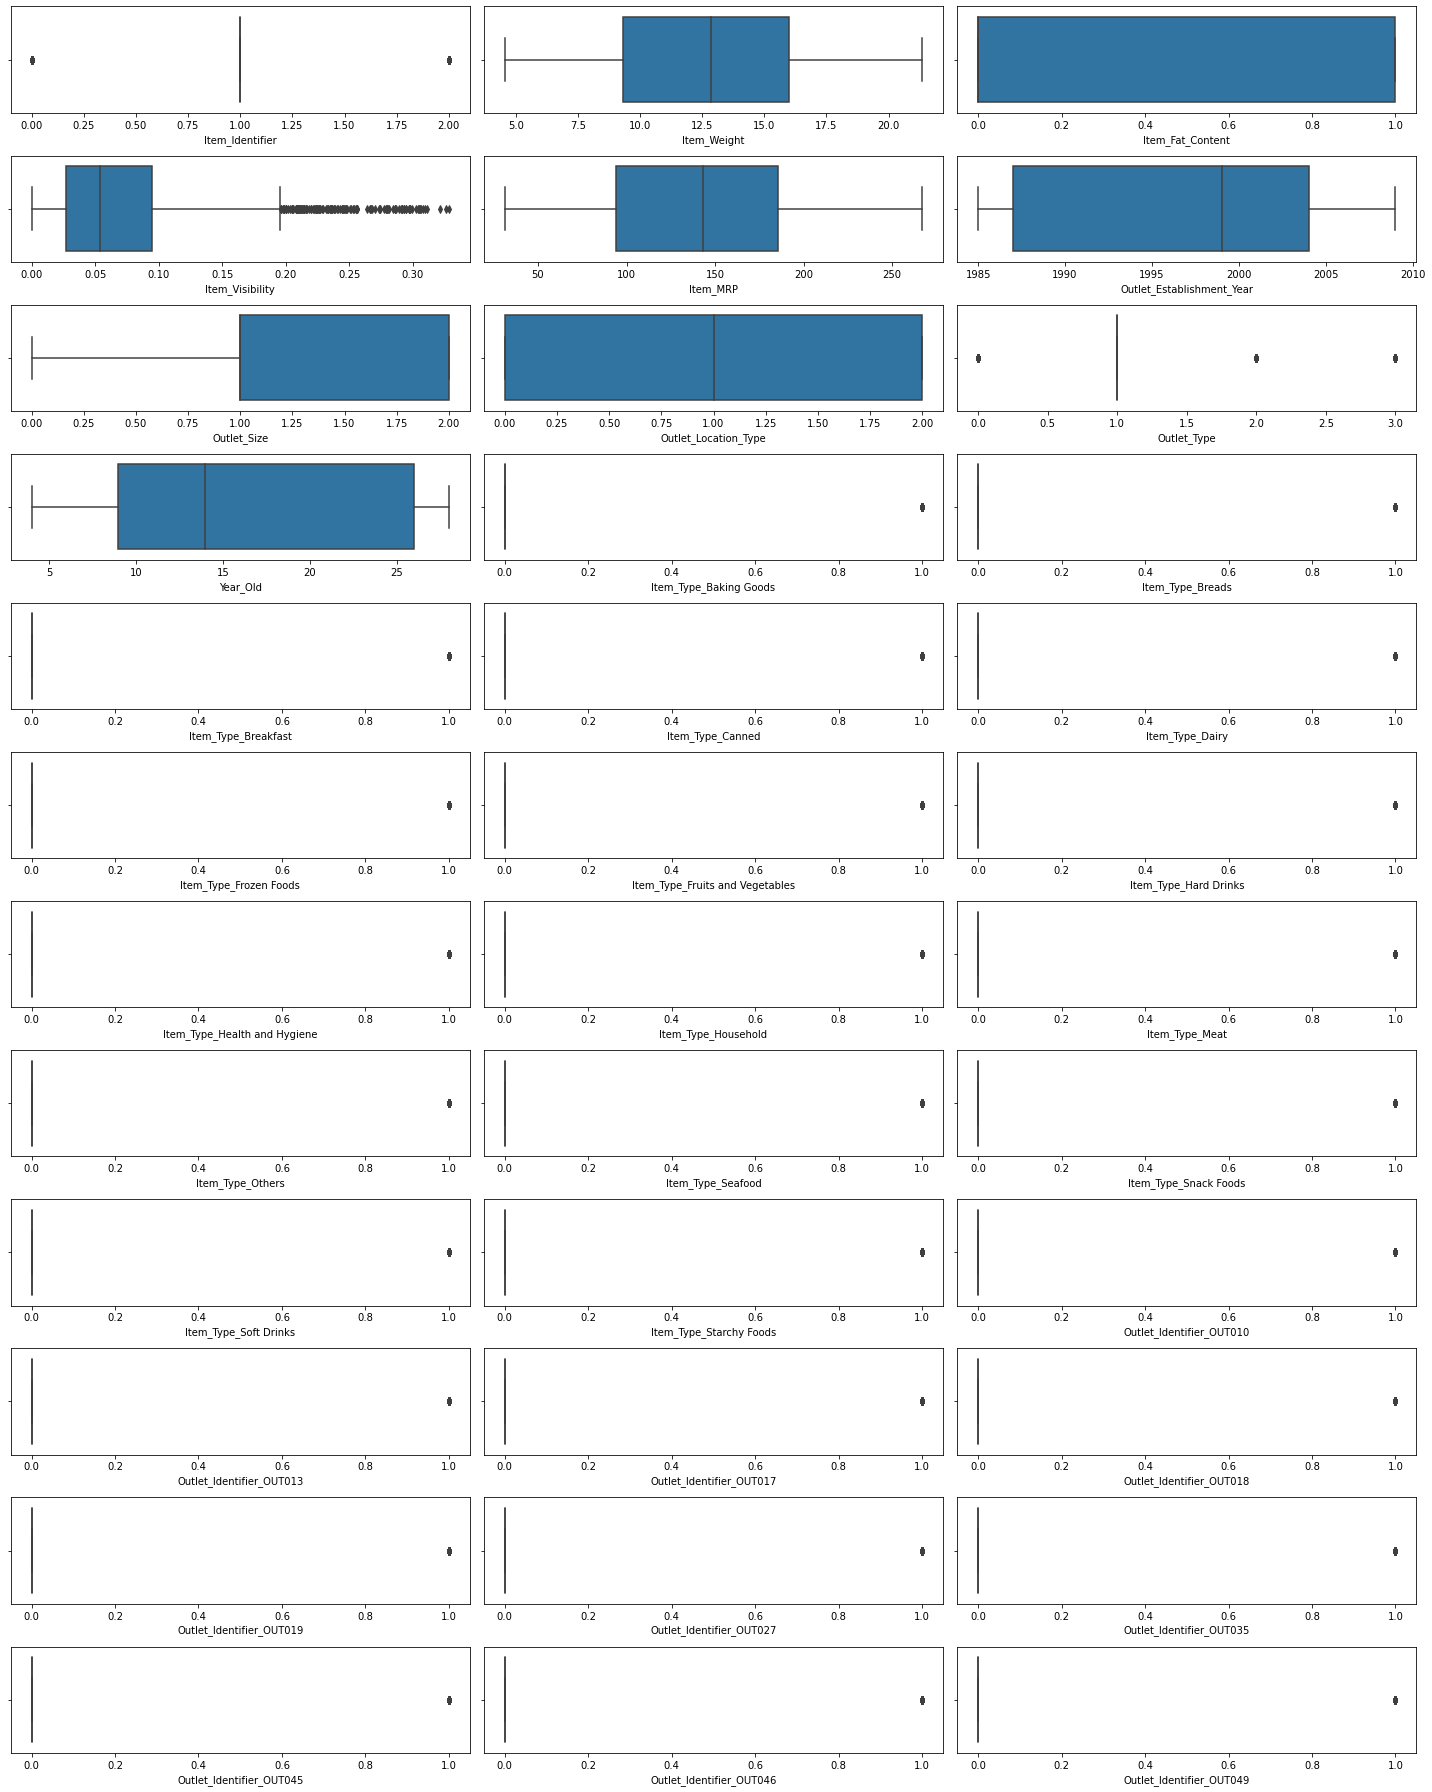

In [57]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [58]:
#Removal of outliers

for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

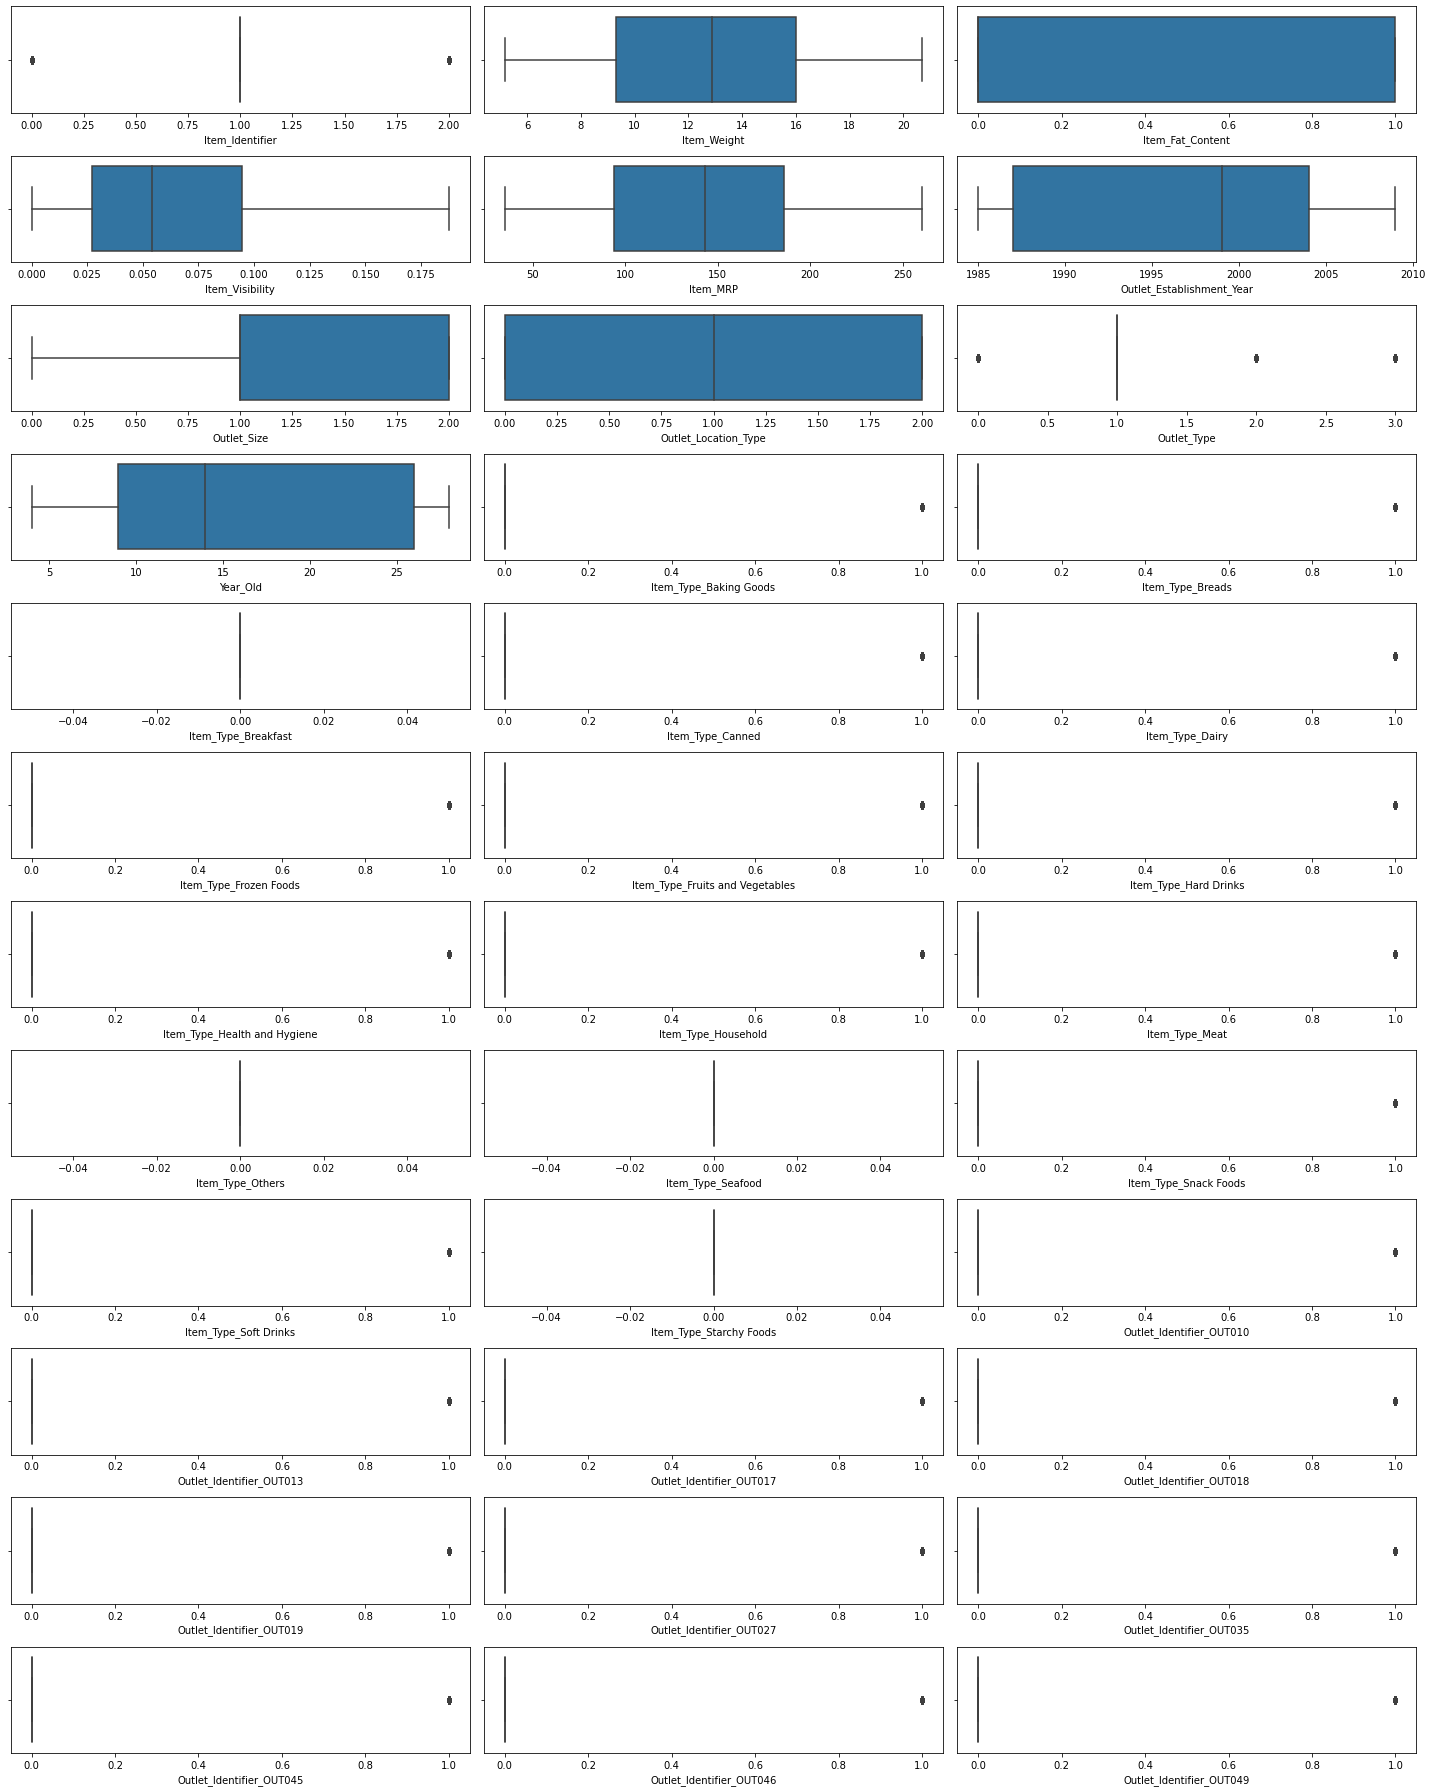

In [59]:
# Plotting boxplot after outliers removal
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: we removed lots of outliers from item_visibility using percentile method

# Checking Skewness

In [60]:
X.skew()

Item_Identifier                    0.114510
Item_Weight                        0.087373
Item_Fat_Content                   0.616705
Item_Visibility                    0.778953
Item_MRP                           0.121872
Outlet_Establishment_Year         -0.396641
Outlet_Size                       -0.087072
Outlet_Location_Type              -0.209093
Outlet_Type                        0.927438
Year_Old                           0.396641
Item_Type_Baking Goods             3.199792
Item_Type_Breads                   5.567533
Item_Type_Breakfast                0.000000
Item_Type_Canned                   3.196644
Item_Type_Dairy                    3.096356
Item_Type_Frozen Foods             2.659119
Item_Type_Fruits and Vegetables    2.021988
Item_Type_Hard Drinks              6.071724
Item_Type_Health and Hygiene       3.668801
Item_Type_Household                2.547106
Item_Type_Meat                     4.136741
Item_Type_Others                   0.000000
Item_Type_Seafood               

# Checking Correlation:

In [61]:
X_corr= X.corr()
X_corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
Item_Identifier,1.000000,0.075479,-0.166111,-0.038881,0.032459,-0.008551,-0.000624,0.007661,0.001136,0.008551,...,0.007201,0.003975,-0.002829,0.001367,0.004139,0.005205,-0.005257,-0.004471,0.004834,-0.011745
Item_Weight,0.075479,1.000000,-0.021846,-0.010868,0.025755,-0.008638,-0.006838,0.003417,-0.001404,0.008638,...,0.003323,0.012395,-0.002602,0.000948,0.001117,-0.000518,-0.002319,-0.017112,0.000696,0.004997
Item_Fat_Content,-0.166111,-0.021846,1.000000,0.049408,0.006061,0.003151,-0.000622,-0.001598,0.002199,-0.003151,...,0.000254,-0.002132,0.004266,0.002129,-0.004300,0.000183,-0.003154,-0.006029,0.003147,0.004722
Item_Visibility,-0.038881,-0.010868,0.049408,1.000000,-0.001285,-0.062115,0.060260,-0.023450,-0.154298,0.062115,...,0.162914,-0.037588,-0.027229,-0.029872,0.181562,-0.047382,-0.028104,-0.033786,-0.033876,-0.031414
Item_MRP,0.032459,0.025755,0.006061,-0.001285,1.000000,0.005014,0.006013,0.000370,-0.001854,-0.005014,...,-0.000875,0.002438,-0.008860,0.003920,-0.005062,-0.006614,0.011958,-0.000218,0.005974,-0.003990
Outlet_Establishment_Year,-0.008551,-0.008638,0.003151,-0.062115,0.005014,1.000000,0.193389,-0.089216,-0.122304,-1.000000,...,0.005301,-0.453388,0.382361,0.466336,-0.393918,-0.538072,0.257868,0.174150,-0.034777,0.048836
Outlet_Size,-0.000624,-0.006838,-0.000622,0.060260,0.006013,0.193389,1.000000,-0.614311,-0.201483,-0.193389,...,-0.075107,-0.683424,-0.099355,-0.099476,0.354967,-0.099896,0.483409,-0.099536,0.483409,-0.099596
Outlet_Location_Type,0.007661,0.003417,-0.001598,-0.023450,0.000370,-0.089216,-0.614311,1.000000,0.467219,0.089216,...,0.288087,0.382481,-0.048488,0.381559,-0.351898,0.383172,-0.048605,-0.048576,-0.479230,-0.479230
Outlet_Type,0.001136,-0.001404,0.002199,-0.154298,-0.001854,-0.122304,-0.201483,0.467219,1.000000,0.122304,...,-0.398067,-0.088530,-0.088210,0.350590,-0.387608,0.792834,-0.088424,-0.088370,-0.088424,-0.088424
Year_Old,0.008551,0.008638,-0.003151,0.062115,-0.005014,-1.000000,-0.193389,0.089216,0.122304,1.000000,...,-0.005301,0.453388,-0.382361,-0.466336,0.393918,0.538072,-0.257868,-0.174150,0.034777,-0.048836


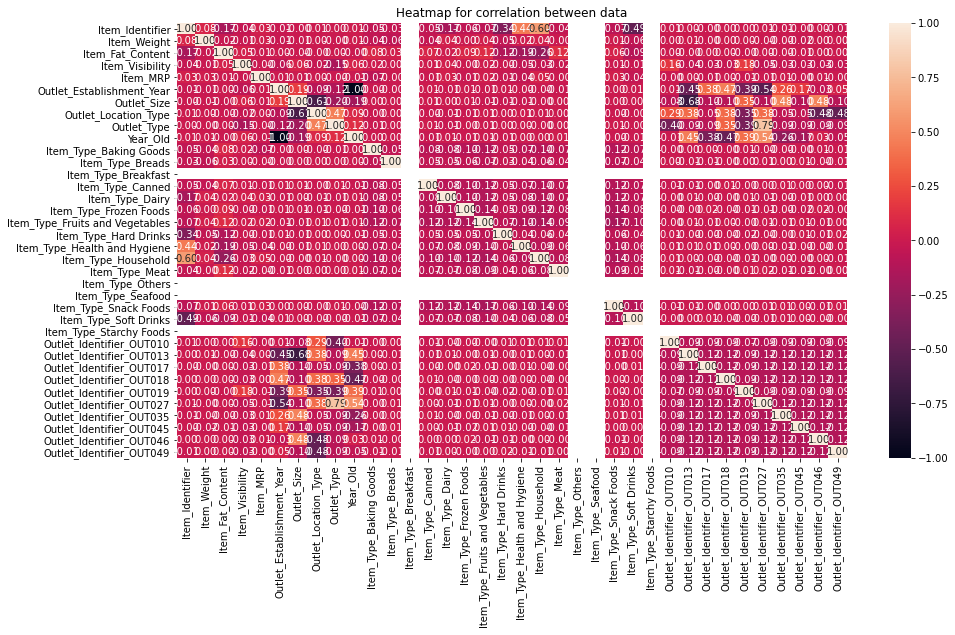

In [62]:
#Checking correlation between data using heatmap
plt.figure(figsize=(15,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True,fmt=".2f")
plt.title('Heatmap for correlation between data')
plt.show()

Remarks: From heatmap we can see we have many columns that have less correlation but some columns like location_type and outlet_identifier have good correlation

In [63]:
x=X

# Feature scaling

In [64]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=x.columns)

In [65]:
test=scaler.fit_transform(test)
test=pd.DataFrame(test,columns=x.columns)

In [66]:
#Removing skewness by transforming data.
from sklearn.preprocessing import power_transform
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [67]:
test=power_transform(X,method='yeo-johnson')
test=pd.DataFrame(test,columns=x.columns)

In [68]:
X_new.skew()

Item_Identifier                    0.032378
Item_Weight                       -0.033566
Item_Fat_Content                   0.616705
Item_Visibility                    0.074855
Item_MRP                          -0.029905
Outlet_Establishment_Year         -0.206070
Outlet_Size                       -0.028743
Outlet_Location_Type              -0.169899
Outlet_Type                       -0.010619
Year_Old                           0.036143
Item_Type_Baking Goods             3.199792
Item_Type_Breads                   5.567533
Item_Type_Breakfast                0.000000
Item_Type_Canned                   3.196644
Item_Type_Dairy                    3.096356
Item_Type_Frozen Foods             2.659119
Item_Type_Fruits and Vegetables    2.021988
Item_Type_Hard Drinks              6.071724
Item_Type_Health and Hygiene       3.668801
Item_Type_Household                2.547106
Item_Type_Meat                     4.136741
Item_Type_Others                   0.000000
Item_Type_Seafood               

In [69]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.455251e+15,56.952598,4.311043e+13,0.000000,0.563847,0.562409,2.455251e+15,2.455251e+15
1,Item_Identifier,-1.092500e+02,151.594059,-7.206747e-01,0.471130,0.563847,0.562409,-4.064112e+02,1.879112e+02
2,Item_Weight,-5.431296e+00,45.423924,-1.195691e-01,0.904827,0.563847,0.562409,-9.447324e+01,8.361065e+01
3,Item_Fat_Content,4.240852e+01,27.968056,1.516320e+00,0.129476,0.563847,0.562409,-1.241568e+01,9.723271e+01
4,Item_Visibility,-6.332718e+01,49.130216,-1.288966e+00,0.197445,0.563847,0.562409,-1.596344e+02,3.298000e+01
5,Item_MRP,3.517565e+03,44.651928,7.877745e+01,0.000000,0.563847,0.562409,3.430036e+03,3.605093e+03
6,Outlet_Establishment_Year,-1.608811e+15,30.359400,-5.299218e+13,0.000000,0.563847,0.562409,-1.608811e+15,-1.608811e+15
7,Outlet_Size,-7.036691e+13,31.015501,-2.268766e+12,0.000000,0.563847,0.562409,-7.036691e+13,-7.036691e+13
8,Outlet_Location_Type,-7.576990e+13,24.610587,-3.078752e+12,0.000000,0.563847,0.562409,-7.576990e+13,-7.576990e+13
9,Outlet_Type,-9.641136e+14,22.046401,-4.373111e+13,0.000000,0.563847,0.562409,-9.641136e+14,-9.641136e+14


In [70]:
y_new=np.log(y)
y_new=pd.DataFrame(y_new,columns=['Item_Outlet_Sales'])

Remarks: We are converting target column into log but at the time of prediction we will inverse it

# Spliting the train test data with random_state = 451

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=451)

# Finding the best ML model:

In [72]:
models={
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

**************************************** GradientBoostingRegressor **********************************************




Score 0.7475348013126482


MEAN_SQUARE_ERROR 1224472.1976588785


MEAN_ABSOLUTE_ERROR 756.0683145691106


RMSE 1106.558718577048


R2_SCORE 0.7475348013126482


MODEL PERFORMANCE CURVE


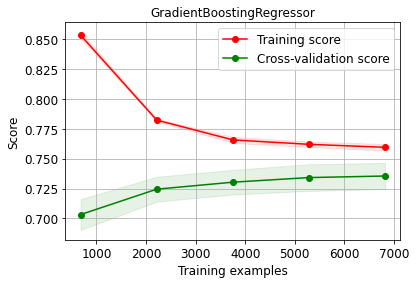

**************************************** LGBMRegressor **********************************************




Score 0.7372853533461412


MEAN_SQUARE_ERROR 1259916.506887382


MEAN_ABSOLUTE_ERROR 765.9579998978443


RMSE 1122.4600246277735


R2_SCORE 0.7372853533461412


MODEL PERFORMANCE CURVE


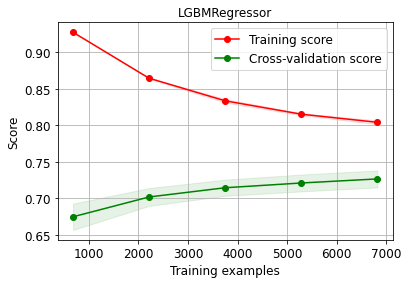

**************************************** RandomForestRegressor **********************************************




Score 0.7197143917419536


MEAN_SQUARE_ERROR 1342990.7082336268


MEAN_ABSOLUTE_ERROR 796.8689180878031


RMSE 1158.8747595118407


R2_SCORE 0.7197143917419536


MODEL PERFORMANCE CURVE


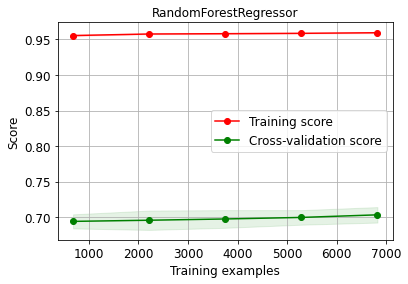

**************************************** XGBRegressor **********************************************




Score 0.7100758929616491


MEAN_SQUARE_ERROR 1356543.6497915273


MEAN_ABSOLUTE_ERROR 803.8166192140962


RMSE 1164.7075383080198


R2_SCORE 0.7100758929616491


MODEL PERFORMANCE CURVE


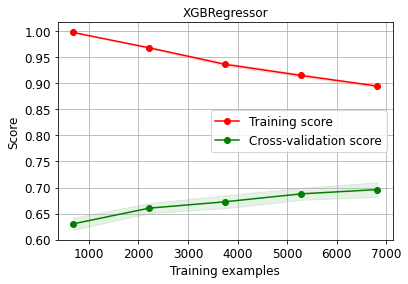

**************************************** ExtraTreesRegressor **********************************************




Score 0.687913779325374


MEAN_SQUARE_ERROR 1484027.756477981


MEAN_ABSOLUTE_ERROR 835.0167100251589


RMSE 1218.2067790313683


R2_SCORE 0.687913779325374


MODEL PERFORMANCE CURVE


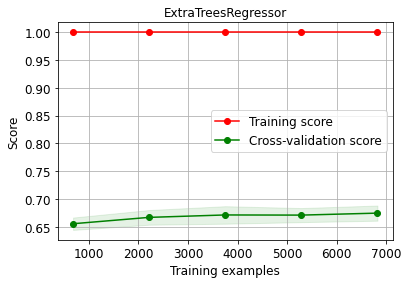

In [73]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
  print("****************************************",name,"**********************************************")
  Model.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("\n")
  cs=cross_val_score(model,X_new,y_new,cv=5,scoring='r2').mean()
  cvs.append(cs*100)
  mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
  Mse.append(mse)
  print("\n")
  sc=model.score(X_test,y_test)
  score.append(sc)
  print("Score",sc)
  print("\n")
  print("MEAN_SQUARE_ERROR",mse)
  print("\n")
  mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  Mae.append(mae)
  print("MEAN_ABSOLUTE_ERROR",mae)
  print("\n")
  rmse=np.sqrt(mse)
  print("RMSE",rmse)
  print("\n")
  print("R2_SCORE",r2_score(y_test,y_pred))
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

In [74]:
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':rmse
})

In [75]:
models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,GradientBoostingRegressor,0.747535,73.537359,1.224472e+06,756.068315,1218.206779
1,LGBMRegressor,0.737285,72.629447,1.259917e+06,765.958000,1218.206779
2,RandomForestRegressor,0.719714,70.287551,1.342991e+06,796.868918,1218.206779
3,XGBRegressor,0.710076,69.393943,1.356544e+06,803.816619,1218.206779
4,ExtraTreesRegressor,0.687914,67.475906,1.484028e+06,835.016710,1218.206779


Remarks:From above model building, GradientBoostingRegressor is giving Cross_val_score = 73.53,so so,we are proceeding with this model.

# Hyper parameter tuning on the best ML Model:

In [76]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [77]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
params={'learning_rate':[0.1,0.01,0.001,0.2],
 'max_depth':[3,2,4,5],
 'min_impurity_decrease':[0.0,0.01,0.02,0.1],
 'min_samples_leaf':[1,2,3],
 'min_samples_split':[2,3,1],
 'n_estimators':[100,200,300]
 }

In [79]:
grid=GridSearchCV(estimator=gbr,param_grid=params,cv=5,n_jobs=-1)

In [80]:
grid.fit(X_new,y_new)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.2],
                         'max_depth': [3, 2, 4, 5],
                         'min_impurity_decrease': [0.0, 0.01, 0.02, 0.1],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 1],
                         'n_estimators': [100, 200, 300]})

In [91]:
#Checking the model performance with best params
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [92]:
grid.best_score_

0.7372318938970093

Remarks: cross_val_score accuracy increased from 73.53 to 73.72

# Saving model

In [93]:
joblib.dump(grid,"BIG_MART.obj")

['BIG_MART.obj']

In [94]:
Mart=joblib.load("BIG_MART.obj")

# Final model learning curve

In [95]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 2,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

Remarks: What we did here is that we placed all the values that we got while hyperparameter tuning just for plotting learning curve

# Final model performance metrics

In [96]:
GBR.fit(X_train,y_train)
y_pred=GBR.predict(X_test)
print("MEAN_SQUARE_ERROR",mean_squared_error(y_test,y_pred))
print("ROOT_MEAN_SQUARE_ERROR",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MEAN_ABSOLUTE_ERROR",mean_absolute_error(y_test,y_pred))
print("R2_SCORE",r2_score(y_test,y_pred))

MEAN_SQUARE_ERROR 0.2635731333846831
ROOT_MEAN_SQUARE_ERROR 0.5133937410844459
MEAN_ABSOLUTE_ERROR 0.3943178287078638
R2_SCORE 0.7488728711409521


In [97]:
test_pred=Mart.predict(test)

In [98]:
test_pred=pd.DataFrame(test_pred,columns=['Total_Sales'])
final_data=pd.concat([Test,np.exp(test_pred)],axis=1)

In [99]:
final_data.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Total_Sales
0,1.0,20.750000,0.0,0.007565,107.8622,1999.0,1.0,0.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3668.219571
1,1.0,8.300000,1.0,0.038428,87.3198,2007.0,1.0,1.0,1.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,585.723981
2,2.0,14.600000,0.0,0.099575,241.7538,1998.0,1.0,2.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.193394
3,1.0,7.315000,0.0,0.015388,155.0340,2007.0,1.0,1.0,1.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,413.000460
4,1.0,12.955040,1.0,0.118599,234.2300,1985.0,1.0,2.0,3.0,28.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,766.303885
5,1.0,9.800000,1.0,0.063817,117.1492,1997.0,2.0,0.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,627.115680
6,1.0,19.350000,1.0,0.082602,50.1034,2009.0,1.0,2.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,771.538098
7,1.0,12.272418,0.0,0.015782,81.0592,1985.0,1.0,2.0,3.0,28.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2466.062219


# Conclusion:

We build a model that can predict the sales, and we did EDA to understand how features are behaving with respect to sales and 
We were having outliers and we removed it by using percentile method. 

We did hyperparameters tuning but accuracy did not increased much.

At the time of model building, we have applied log on target column and at the time of prediction,we inversed it so we can see the original price.

Finally we built a model that can predict the Item_Outlet_Sales with 73.72% accuracy.